In [10]:
import numpy as np
import matplotlib.pyplot as plt


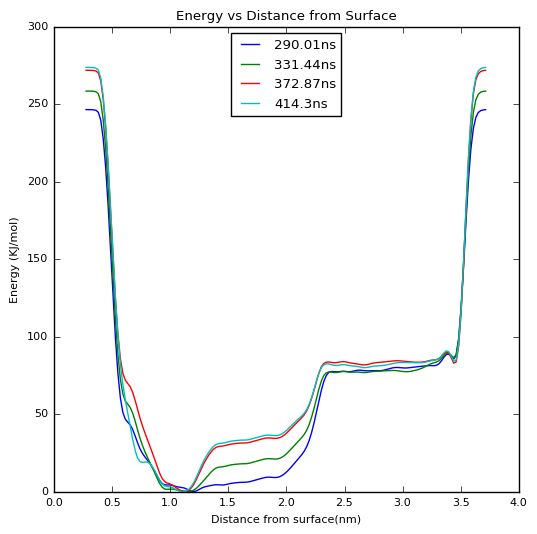

In [11]:
total = 4143
percent =[0.7,0.8,0.9,1]
plt.figure(figsize=(6,6))
for i in percent:
    data = np.genfromtxt('fesfiles_z/fes_{}.dat'.format(int(total*i)),comments='#')
    X = data[:,0]
    Y = data[:,1]
    plt.plot(X,Y,label='{}ns'.format(i/10*total))
    plt.xlabel('Distance from surface(nm)')
    plt.ylabel('Energy (KJ/mol)')
    plt.rcParams.update({'font.size': 8})
plt.title("Energy vs Distance from Surface")
plt.legend(loc='upper center')
plt.show()

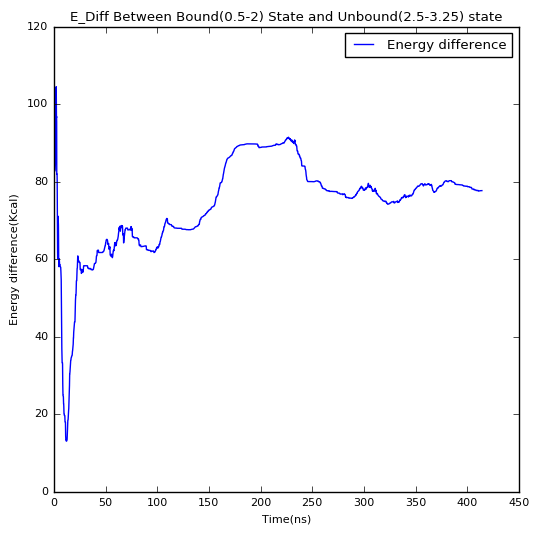

In [13]:
#T = 300
total = 4143
bound_left = 0.5
bound_right = 2.0
un_bound_left = 2.5
un_bound_right = 3.25

E_diff = np.zeros(total)
plt.figure(figsize=(6,6))
for i in range(total):
    data = np.genfromtxt('fesfiles_z/fes_{}.dat'.format(i),comments='#')
    X = data[:,0]
    Y = data[:,1]
    bound = 0
    un_bound = 0
    for j in range(X.shape[0]):
        if (X[j]>=bound_left and X[j]<=bound_right):
            bound += np.exp(-Y[j]/2.5)
        if (X[j]>=un_bound_left and X[j]<=un_bound_right):
            un_bound += np.exp(-Y[j]/2.5)
    bound = -2.5 * np.log(bound)
    un_bound = -2.5 * np.log(un_bound)
    E_diff[i] = un_bound - bound
plt.plot(np.arange(total)/10,E_diff,label='Energy difference')
plt.title("E_Diff Between Bound(0.5-2) State and Unbound(2.5-3.25) state")
plt.xlabel("Time(ns)")
plt.ylabel("Energy difference(Kcal)")
plt.legend(loc='best')
plt.show()